
# ---> MODELO DE PROPENSION DE COMPRA <---

# 1. CARGA DE DATOS

In [1]:
import numpy as np
import pandas as pd
# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("DS_Compra.csv")
# Revición Inicial
data.head()

,ID,SEXO,EDAD,INGRESOS,ESTADOCIVIL,FLAG_COMPRA
0,10001,M,19.0,1500,S,0
1,10002,M,35.0,1600,C,0
2,10003,F,26.0,3500,C,0
3,10004,F,27.0,4700,C,0
4,10005,M,19.0,6300,S,0


In [3]:
data.tail()

,ID,SEXO,EDAD,INGRESOS,ESTADOCIVIL,FLAG_COMPRA
395,10396,F,46.0,3400,C,1
396,10397,M,51.0,1900,S,1
397,10398,F,50.0,1600,S,1
398,10399,M,36.0,2700,C,0
399,10400,F,49.0,3000,C,1


In [4]:
data.shape

(400, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           400 non-null    int64  
 1   SEXO         400 non-null    object 
 2   EDAD         387 non-null    float64
 3   INGRESOS     400 non-null    int64  
 4   ESTADOCIVIL  392 non-null    object 
 5   FLAG_COMPRA  400 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 18.9+ KB


In [6]:
# Obtenere tipos de datos
pd.DataFrame(data.dtypes)

,0
ID,int64
SEXO,object
EDAD,float64
INGRESOS,int64
ESTADOCIVIL,object
FLAG_COMPRA,int64


# 2. ANÁLISIS DESCRIPTIVO DE LOS DATOS

In [7]:
data.describe(include = 'all')

,ID,SEXO,EDAD,INGRESOS,ESTADOCIVIL,FLAG_COMPRA
count,400.000000,400,387.000000,400.000000,392,400.000000
unique,NaN,2,NaN,NaN,3,NaN
top,NaN,F,NaN,NaN,S,NaN
freq,NaN,204,NaN,NaN,214,NaN
mean,10200.500000,NaN,37.589147,6476.500000,NaN,0.357500
std,115.614301,NaN,10.523312,7705.031897,NaN,0.479864
min,10001.000000,NaN,18.000000,1200.000000,NaN,0.000000
25%,10100.750000,NaN,29.000000,3500.000000,NaN,0.000000
50%,10200.500000,NaN,37.000000,5800.000000,NaN,0.000000
75%,10300.250000,NaN,46.000000,7300.000000,NaN,1.000000


In [8]:
# Frecuencias de estado civil
data["ESTADOCIVIL"].value_counts()

S    214
C    125
D     53
Name: ESTADOCIVIL, dtype: int64

In [9]:
# Frecuencias relativas de estado civil
data["ESTADOCIVIL"].value_counts(normalize = True, dropna = False) 
# normalize: para frecuenciaas relativas 
# dropna: eliminar nulos

S      0.5350
C      0.3125
D      0.1325
NaN    0.0200
Name: ESTADOCIVIL, dtype: float64

In [10]:
# Edad
data["EDAD"].value_counts(bins = 5 , normalize = True)
# bins: nro de rangos a agrupar
# normalize: para frecuenciaas relativas 

(34.8, 43.2]                  0.3450
(26.4, 34.8]                  0.1900
(17.956999999999997, 26.4]    0.1625
(43.2, 51.6]                  0.1600
(51.6, 60.0]                  0.1100
Name: EDAD, dtype: float64

In [11]:
# Generar rangos según nuestross límites deseados:
def genera_rangos(valor):
    if pd.isnull(valor):
        return("Nuloooooooo")
    elif valor <= 30 :
        return("[18-30]")
    elif valor <= 50 :
        return("(30-50]")
    elif valor <= 60 :
        return("(50-60]")
    else:
        return('Nan')
genera_rangos(35)

'(30-50]'

In [12]:
data["EDAD_RANGO"] = data["EDAD"].apply(lambda x: genera_rangos(x))

In [13]:
data["EDAD_RANGO"].value_counts(normalize = True)

(30-50]        0.5775
[18-30]        0.2725
(50-60]        0.1175
Nuloooooooo    0.0325
Name: EDAD_RANGO, dtype: float64

In [14]:
pd.DataFrame(data.dtypes)

,0
ID,int64
SEXO,object
EDAD,float64
INGRESOS,int64
ESTADOCIVIL,object
FLAG_COMPRA,int64
EDAD_RANGO,object


In [15]:
# Ver solo las columnas del dataframe:
data.columns.values

array(['ID', 'SEXO', 'EDAD', 'INGRESOS', 'ESTADOCIVIL', 'FLAG_COMPRA',
       'EDAD_RANGO'], dtype=object)

In [16]:
# Seleccionar variables categoricas (object)
vars_str = data.select_dtypes(include = ['object']).columns.values

In [17]:
for feature in vars_str:
    print("---------------------------------------------")
    print(data[feature].value_counts(normalize = True, dropna = False))

---------------------------------------------
F    0.51
M    0.49
Name: SEXO, dtype: float64
---------------------------------------------
S      0.5350
C      0.3125
D      0.1325
NaN    0.0200
Name: ESTADOCIVIL, dtype: float64
---------------------------------------------
(30-50]        0.5775
[18-30]        0.2725
(50-60]        0.1175
Nuloooooooo    0.0325
Name: EDAD_RANGO, dtype: float64


In [18]:
# Concatenar dataframes
pd.concat([data,data], axis = 1)  # axis = 0: concatena por filas, axis = 1: concatena por columnnas

,ID,SEXO,EDAD,INGRESOS,ESTADOCIVIL,FLAG_COMPRA,EDAD_RANGO,ID,SEXO,EDAD,INGRESOS,ESTADOCIVIL,FLAG_COMPRA,EDAD_RANGO
0,10001,M,19.0,1500,S,0,[18-30],10001,M,19.0,1500,S,0,[18-30]
1,10002,M,35.0,1600,C,0,(30-50],10002,M,35.0,1600,C,0,(30-50]
2,10003,F,26.0,3500,C,0,[18-30],10003,F,26.0,3500,C,0,[18-30]
3,10004,F,27.0,4700,C,0,[18-30],10004,F,27.0,4700,C,0,[18-30]
4,10005,M,19.0,6300,S,0,[18-30],10005,M,19.0,6300,S,0,[18-30]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,10396,F,46.0,3400,C,1,(30-50],10396,F,46.0,3400,C,1,(30-50]
396,10397,M,51.0,1900,S,1,(50-60],10397,M,51.0,1900,S,1,(50-60]
397,10398,F,50.0,1600,S,1,(30-50],10398,F,50.0,1600,S,1,(30-50]
398,10399,M,36.0,2700,C,0,(30-50],10399,M,36.0,2700,C,0,(30-50]


In [19]:
df1 = pd.DataFrame(data["ESTADOCIVIL"].value_counts())
df1 = df1.rename(columns = {'ESTADOCIVIL' : "FREC_ABS"})
df1.head()

,FREC_ABS
S,214
C,125
D,53


In [20]:
df2 = pd.DataFrame(data["ESTADOCIVIL"].value_counts(normalize = True))
df2 = df2.rename(columns = {'ESTADOCIVIL' : "FREC_REL"})
df2.head()

,FREC_REL
S,0.545918
C,0.318878
D,0.135204


In [21]:
df3 = pd.DataFrame(data.groupby(by=['ESTADOCIVIL'], as_index = False )['FLAG_COMPRA'].mean())
df3.head()

,ESTADOCIVIL,FLAG_COMPRA
0,C,0.248000
1,D,0.245283
2,S,0.448598


In [22]:
data.pivot_table(index = ['ESTADOCIVIL'] , 
                 columns = ['FLAG_COMPRA'], 
                 values = ['ID'], 
                 aggfunc = 'count')       

ID    
FLAG_COMPRA    0   1
ESTADOCIVIL         
C             94  31
D             40  13
S            118  96

In [23]:
data.pivot_table(index = ['ESTADOCIVIL'] , 
                 columns = ['SEXO'], 
                 values = ['FLAG_COMPRA'], 
                 aggfunc = 'mean')       

FLAG_COMPRA          
SEXO                  F         M
ESTADOCIVIL                      
C              0.258065  0.238095
D              0.275862  0.208333
S              0.481481  0.415094

# 3. PREPROCESAMIENTO DE DATOS

## 3.1 Tratamiento de Valores Nulos

In [24]:
data.isnull().sum()

ID              0
SEXO            0
EDAD           13
INGRESOS        0
ESTADOCIVIL     8
FLAG_COMPRA     0
EDAD_RANGO      0
dtype: int64

In [25]:
#### Imputar valores missing
data["EDAD"].fillna(data["EDAD"].median(), inplace = True)
data["ESTADOCIVIL"].fillna(data["ESTADOCIVIL"].mode()[0], inplace = True)

In [26]:
data.isnull().sum()

ID             0
SEXO           0
EDAD           0
INGRESOS       0
ESTADOCIVIL    0
FLAG_COMPRA    0
EDAD_RANGO     0
dtype: int64

## 3.2 Tratamiento de Outliers

In [27]:
# Percetiles 
np.nanpercentile(data['EDAD'], [0,1,5,10,50,75,90,95, 99,100])

array([18., 18., 21., 24., 37., 45., 52., 57., 60., 60.])

In [28]:
# Calcular Percentile 90
np.nanpercentile(data['EDAD'], [90])[0]

52.0

In [29]:
# Identificar registros con edad mayor al percentile 90
indices_percmayor90 = data['EDAD'] > np.nanpercentile(data['EDAD'], [90])[0]

In [30]:
# "Topeamos" (reemplazo esos valores por un valor tope (perc 90))
data.loc[indices_percmayor90, "EDAD"] = 52

In [31]:
max(data.EDAD)

52.0

## 3.2 Conversion de Variables

In [32]:
df = data.copy()

In [33]:
df.head(10)

,ID,SEXO,EDAD,INGRESOS,ESTADOCIVIL,FLAG_COMPRA,EDAD_RANGO
0,10001,M,19.0,1500,S,0,[18-30]
1,10002,M,35.0,1600,C,0,(30-50]
2,10003,F,26.0,3500,C,0,[18-30]
3,10004,F,27.0,4700,C,0,[18-30]
4,10005,M,19.0,6300,S,0,[18-30]
5,10006,M,27.0,4800,C,0,[18-30]
6,10007,F,27.0,7000,C,0,[18-30]
7,10008,F,32.0,80000,C,1,(30-50]
8,10009,M,25.0,2700,C,0,[18-30]
9,10010,F,37.0,5400,C,0,Nuloooooooo


In [34]:
# SEXO -- Variable Dummy
dicc_sexo = {'M': 1,
             'F': 0}
df['SEXO'] = df['SEXO'].map(dicc_sexo)

In [35]:
# ESTADOCIVIL
df_ec_dummies = pd.get_dummies(df["ESTADOCIVIL"], prefix = 'ESTADOCIVIL')#, drop_first = True)

In [36]:
del df["ESTADOCIVIL"]

In [37]:
df = pd.concat([df,df_ec_dummies], axis = 1)

In [38]:
df.head()

,ID,SEXO,EDAD,INGRESOS,FLAG_COMPRA,EDAD_RANGO,ESTADOCIVIL_C,ESTADOCIVIL_D,ESTADOCIVIL_S
0,10001,1,19.0,1500,0,[18-30],0,0,1
1,10002,1,35.0,1600,0,(30-50],1,0,0
2,10003,0,26.0,3500,0,[18-30],1,0,0
3,10004,0,27.0,4700,0,[18-30],1,0,0
4,10005,1,19.0,6300,0,[18-30],0,0,1


In [39]:
# EDAD_RANGO
df.EDAD_RANGO.unique()

array(['[18-30]', '(30-50]', 'Nuloooooooo', '(50-60]'], dtype=object)

In [40]:
dicc_rangoEdad = {'[18-30]': 0,
             '(30-50]': 1,
             '(50-60]': 2,
             'Nuloooooooo' : 9}
df['EDAD_RANGO'] = df['EDAD_RANGO'].map(dicc_rangoEdad)

In [41]:
df

,ID,SEXO,EDAD,INGRESOS,FLAG_COMPRA,EDAD_RANGO,ESTADOCIVIL_C,ESTADOCIVIL_D,ESTADOCIVIL_S
0,10001,1,19.0,1500,0,0,0,0,1
1,10002,1,35.0,1600,0,1,1,0,0
2,10003,0,26.0,3500,0,0,1,0,0
3,10004,0,27.0,4700,0,0,1,0,0
4,10005,1,19.0,6300,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
395,10396,0,46.0,3400,1,1,1,0,0
396,10397,1,51.0,1900,1,2,0,0,1
397,10398,0,50.0,1600,1,1,0,0,1
398,10399,1,36.0,2700,0,1,1,0,0


## 3.3 Preselección de Variables

In [42]:
list(df.columns)

['ID',
 'SEXO',
 'EDAD',
 'INGRESOS',
 'FLAG_COMPRA',
 'EDAD_RANGO',
 'ESTADOCIVIL_C',
 'ESTADOCIVIL_D',
 'ESTADOCIVIL_S']

In [43]:
features_to_model = ['SEXO',
 'EDAD',
 'INGRESOS',
 'EDAD_RANGO',
 'ESTADOCIVIL_C',                     
 'ESTADOCIVIL_D',
 'ESTADOCIVIL_S']

In [44]:
X_data = df[features_to_model]
X_data.head()

,SEXO,EDAD,INGRESOS,EDAD_RANGO,ESTADOCIVIL_C,ESTADOCIVIL_D,ESTADOCIVIL_S
0,1,19.0,1500,0,0,0,1
1,1,35.0,1600,1,1,0,0
2,0,26.0,3500,0,1,0,0
3,0,27.0,4700,0,1,0,0
4,1,19.0,6300,0,0,0,1


In [45]:
y_data = df['FLAG_COMPRA']

In [47]:
# Separar Data de Training y data de Test
# Separar Data de Training y data de Test
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    train_size = 0.60, 
                                                    random_state = 20)

# 4. MODELAMIENTO

### 4.1 REGRESION LOGISTICA

In [52]:
from sklearn.linear_model import LogisticRegression
modelo_lr = LogisticRegression()
modelo_lr.fit(X_train,y_train)

# PREDICCION
#---------------------------------------------------------------------------------------------
predicion =  modelo_lr.predict(X_train)
predicion_test = modelo_lr.predict(X_test)

In [53]:
y_train.shape, predicion.shape, X_train.shape, X_test.shape

((240,), (240,), (240, 7), (160, 7))

In [54]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicion_test))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89        97
           1       0.95      0.67      0.79        63

    accuracy                           0.86       160
   macro avg       0.89      0.82      0.84       160
weighted avg       0.87      0.86      0.85       160



In [55]:
predicion_train = modelo_lr.predict(X_train)
print(metrics.classification_report(y_train, predicion_train))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       160
           1       0.79      0.71      0.75        80

    accuracy                           0.84       240
   macro avg       0.83      0.81      0.82       240
weighted avg       0.84      0.84      0.84       240



In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, predicion_train)

array([[145,  15],
       [ 23,  57]], dtype=int64)

In [57]:
confusion_matrix(y_test, predicion_test)

array([[95,  2],
       [21, 42]], dtype=int64)

In [58]:
def graficar_roc(y_test,y_pred_proba):
    import matplotlib.pyplot as plt
    from sklearn import metrics as mt

    fpr, tpr, thresholds  = mt.roc_curve(y_test.astype('int'),y_pred_proba[:,1], pos_label = 1)

    roc_auc = mt.auc(fpr, tpr)

    print ('ROC AUC: %0.4f' % roc_auc)
    gini_print = (2*roc_auc - 1)

    # Plot of a ROC curve for a specific class
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f) \nGini (2*roc_auc - 1) = %0.4f' %(roc_auc,gini_print))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [59]:
predicion_test_proba = modelo_lr.predict_proba(X_test)

In [60]:
predicion_train_proba = modelo_lr.predict_proba(X_train)

ROC AUC: 0.9076


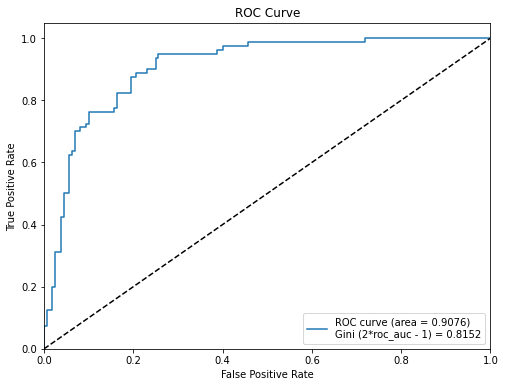

In [61]:
graficar_roc(y_train, predicion_train_proba)

ROC AUC: 0.9323


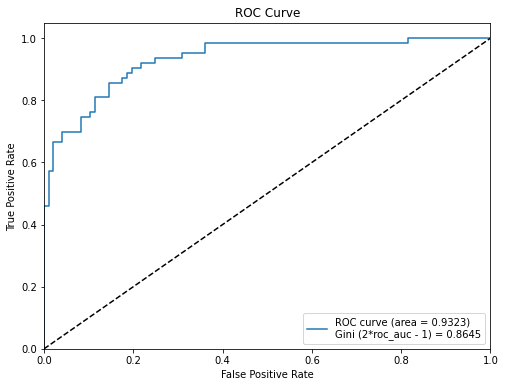

In [62]:
graficar_roc(y_test, predicion_test_proba)

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, predicion_train)

0.8416666666666667

In [64]:
accuracy_score(y_test, predicion_test)

0.85625

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [66]:
X_train_scaler = scaler.transform(X_train)
X_train_scaler = pd.DataFrame(X_train_scaler, columns=X_train.columns)
X_train_scaler.head()

,SEXO,EDAD,INGRESOS,EDAD_RANGO,ESTADOCIVIL_C,ESTADOCIVIL_D,ESTADOCIVIL_S
0,-0.975305,0.399869,0.073862,-0.070684,-0.67420,2.751623,-1.153298
1,-0.975305,-1.034025,-0.685593,-0.698984,1.48324,-0.363422,-1.153298
2,1.025320,-1.546130,-0.870825,-0.698984,-0.67420,-0.363422,0.867078
3,1.025320,-0.726762,0.925932,-0.698984,1.48324,-0.363422,-1.153298
4,1.025320,1.116816,-0.018755,-0.070684,-0.67420,-0.363422,0.867078


In [67]:
X_test_scaler = scaler.transform(X_test)
X_test_scaler = pd.DataFrame(X_test_scaler, columns=X_test.columns)
X_test_scaler.head()

,SEXO,EDAD,INGRESOS,EDAD_RANGO,ESTADOCIVIL_C,ESTADOCIVIL_D,ESTADOCIVIL_S
0,-0.975305,-1.136446,0.073862,-0.698984,-0.67420,-0.363422,0.867078
1,-0.975305,0.707132,0.981502,-0.070684,1.48324,-0.363422,-1.153298
2,-0.975305,-0.009815,0.073862,-0.070684,1.48324,-0.363422,-1.153298
3,-0.975305,-0.726762,0.055338,-0.698984,-0.67420,2.751623,-1.153298
4,-0.975305,-1.034025,-0.315127,-0.698984,1.48324,-0.363422,-1.153298


In [68]:
X_train = X_train_scaler.copy()
X_test = X_test_scaler.copy()

In [69]:
modelo_lr.fit(X_train,y_train)
predicion_train = modelo_lr.predict(X_train)
predicion_test = modelo_lr.predict(X_test)

### 4.1.1 Entrenamiento y Predicción

### 4.1.2 Evaluación del Modelo

## 4.X ÁRBOL DE DECISIÓN

### 4.X.1 Entrenamiento y Predicción

### 4.X.2 Evaluación del Modelo

### 4.1.3 Variables Importantes

In [70]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = model.feature_importances_

NameError: name 'model' is not defined

In [71]:
ftrs = features.sort_values(by = ['importance','feature'],ascending=False)
ftrs = ftrs.reset_index(drop = True)
ftrs

KeyError: 'importance'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
g = sns.barplot(x='feature', y='importance', data=ftrs, order=ftrs['feature'], ax=ax, palette='BuGn_r')